# Data Mining Project - Predicting Interest Rates
Markus Kängsepp

## Preprocessing Data

In [28]:
file1 = "data_loan/LoanStats_securev1_2016Q1.csv"
file2 = "data_loan/LoanStats_securev1_2016Q2.csv"
file3 = "data_loan/LoanStats_securev1_2016Q3.csv"
file4 = "data_loan/LoanStats_securev1_2016Q4.csv"

f_desc = "data_loan/loan_desc.csv"

In [29]:
dataQ1 <- read.csv(file1, skip = 1)  # Added line with description so skip = 2.
dataQ2 <- read.csv(file2, skip = 1)
dataQ3 <- read.csv(file3, skip = 1)
dataQ4 <- read.csv(file4, skip = 1)

In [30]:
head(dataQ1)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
76153534,NA,28000,28000,28000,36 months,6.49%,858.05,A,A2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76153691,NA,7200,7200,7200,36 months,8.39%,226.92,B,B1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75993542,NA,10850,10850,10850,36 months,13.67%,369.10,C,C3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75273614,NA,2000,2000,2000,36 months,28.34%,83.10,G,G3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75359225,NA,20000,20000,20000,36 months,5.32%,602.30,A,A1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
74805010,NA,3000,3000,3000,36 months,9.75%,96.45,B,B3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Additional Information About Features

In [97]:
n = length(colnames(dataQ1))

col_desc = rep("", n)


for(i in c(1:128))
{
    #print(colnames(dataQ1)[i])
    #print(as.character(desc[desc$V1 == colnames(dataQ1)[i], 2][1]))
    d = as.character(desc[desc$V1 == colnames(dataQ1)[i], 2])
    if(length(d) == 0)
    {
        d = ""
    }
    
    col_desc[i] = d
    
}

col_desc = cbind(colnames(dataQ1), col_desc)

In [103]:
write.table(t(col_desc), file = "data_loan/sorted_desc.csv", sep = ",", col.names = F, row.names = F)

### Selecting initial columns that may be useful

In [ ]:
## total_acc (37) last interesting row
#colnames(dataQ1)[37]

# Put all data to one data.frame
data16 = rbind(head(dataQ1[, c(1:37)],-2), head(dataQ2[, c(1:37)],-2), head(dataQ3[, c(1:37)],-2), head(dataQ4[, c(1:37)],-2))

In [55]:
#write.csv(data2016, "data_loan/data16.csv", row.names = F)  # For some reason turns some months to numbers... i.e Jan-16 to 42401

In [56]:
data16 <- read.csv("data_loan/data16.csv")

In [57]:
head(data16[,c(1:10)])
head(data16[,c(10:20)])

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
76153534,NA,28000,28000,28000,36 months,6.49%,858.05,A,A2
76153691,NA,7200,7200,7200,36 months,8.39%,226.92,B,B1
75993542,NA,10850,10850,10850,36 months,13.67%,369.10,C,C3
75273614,NA,2000,2000,2000,36 months,28.34%,83.10,G,G3
75359225,NA,20000,20000,20000,36 months,5.32%,602.30,A,A1
74805010,NA,3000,3000,3000,36 months,9.75%,96.45,B,B3


sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
A2,IT,10+ years,MORTGAGE,117000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76153534,
B1,Director of Slots,10+ years,RENT,197000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76153691,
C3,Manager,10+ years,MORTGAGE,44000,Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75993542,
G3,security officer,2 years,RENT,24000,Verified,Mar-16,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75273614,
A1,President,10+ years,MORTGAGE,165000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75359225,
B3,sales,< 1 year,RENT,24000,Source Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=74805010,


In [34]:
str(data16$emp_length)

 Factor w/ 13 levels "","< 1 year",..: 4 4 4 5 4 2 6 6 3 12 ...


### Clean Data with OpenRefine

Changes made to data using OpenRefine:
- emp_length: changed to numeric, where <1 years is 0 and 10+ years is 10
- int_rate: changed to numeric
- term: to numeric (36 months to 36 and 60 months to 60)
- home_ownership: to numeric - ANY - 4, RENT - 3, MORTGAGE - 2, OWN - 1
- verification_status: Verified - 1, Source Verified - 2 and Not Verified - 3
- issue_d: months to numeric
- zip_code:  instead of ***XX only numbers kept (i.e 321XX to 321)
- removing blank lines (last 2 rows for each quarter) - that contained info about total amount founded by policy code 1 and 2.
- removing unnecessary features that are cannot be used for assigning interest rate: 
    - id
    - member_id
    - loan status (is not known at the moment of assigning interest rate)
    - payment plan (only yes - if trouble paying loan)
    - installment (calculated from interest and loan amount) - so direct correlation
    - emp_title - too many different titles, should cluster before
    - url - to given case (need to be member in Lending Club to check this)
    - desc - only couple of descriptions
    - title - subtitle of purpose (only little more information, mostly overlapping)
    - earliest_cr_line
    


### Taking Care of Unknown Values

In [18]:
train_data <- read.csv("data_loan/data16_cleaned2.csv")
test_data <- read.csv("data_loan/data17_test_cleaned2.csv")

In [19]:
# Change factor values to numeric
train_data$emp_length <- as.numeric(as.character(train_data$emp_length))
test_data$emp_length <- as.numeric(as.character(test_data$emp_length))
test_data$home_ownership <- as.numeric(as.character(test_data$home_ownership))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [20]:
mean1 <- round(mean(train_data[, "inq_last_6mths"], na.rm=TRUE))  # Mean value for that attribute
# Max for following two as I assume there are no information because no delinq's or record's happened or available
max2 <- max(train_data[, "mths_since_last_delinq"], na.rm=TRUE)  
max3 <- max(train_data[, "mths_since_last_record"], na.rm=TRUE)
# Mean value for revol_util attribute
mean4 <- mean(train_data[, "revol_util"], na.rm=TRUE)
mean5 <- mean(train_data[, "emp_length"], na.rm=TRUE)

# Same thing for test data
t_mean1 <- round(mean(test_data[, "zip_code"], na.rm=TRUE))  # Should look for closest neighbors to predict this?
# Max for following two as I assume there are no information because no delinq's or record's happened or available
t_max2 <- max(test_data[, "mths_since_last_delinq"], na.rm=TRUE)  
t_max3 <- max(test_data[, "mths_since_last_record"], na.rm=TRUE)
# Mean value for revol_util attribute
t_mean4 <- mean(test_data[, "revol_util"], na.rm=TRUE)
t_mean5 <- mean(test_data[, "emp_length"], na.rm=TRUE)

#### Replace NA-s with Mean and Max values of Attributes

In [21]:
train_data[is.na(train_data[, "inq_last_6mths"]), "inq_last_6mths"] <- mean1
train_data[is.na(train_data[, "mths_since_last_delinq"]), "mths_since_last_delinq"] <- max2
train_data[is.na(train_data[, "mths_since_last_record"]), "mths_since_last_record"] <- max3
train_data[is.na(train_data[, "revol_util"]), "revol_util"] <- mean4
train_data[is.na(train_data[, "emp_length"]), "emp_length"] <- mean5

test_data[is.na(test_data[, "zip_code"]), "zip_code"] <- t_mean1
test_data[is.na(test_data[, "mths_since_last_delinq"]), "mths_since_last_delinq"] <- t_max2
test_data[is.na(test_data[, "mths_since_last_record"]), "mths_since_last_record"] <- t_max3
test_data[is.na(test_data[, "revol_util"]), "revol_util"] <- t_mean4
test_data[is.na(test_data[, "emp_length"]), "emp_length"] <- t_mean5
test_data[is.na(test_data[, "home_ownership"]), "home_ownership"] <- 4  # means ANY (as we do not know the right val)

In [22]:
write.csv(train_data, "data_loan/data16_cleaned3.csv", row.names=FALSE)
write.csv(test_data, "data_loan/data17_test_cleaned3.csv", row.names=FALSE)

## Preparing data: splitting, scaling etc

### First read in cleanest data

In [23]:
train_data <- read.csv("data_loan/data16_cleaned3.csv")
test_data <- read.csv("data_loan/data17_test_cleaned3.csv")

In [102]:
# Small sample for testing algorithms, skip if not needed

n <- nrow(train_data)
set.seed(3)
sample <- sample(n, 10000)
data_sample_int <- train_data[sample, c(-6,-7)]
data_sample_grade <- train_data[sample, c(-5,-7)]

### Split Data to Train, Validation and Test

In [25]:
set.seed(10)
n <- nrow(train_data)
sample <- sample(n, n*0.75)
data_train <- train_data[sample,]
data_val <- train_data[-sample,]

int_rate_train <- data_train$int_rate
int_rate_val <- data_val$int_rate
int_rate_test <- test_data$int_rate

grade_train <- data_train$grade
grade_val <- data_val$grade
grade_test <- test_data$grade

# Remove int_rate, grade, sub_grade - all these are targets      
data_train <- data_train[, c(-5, -6, -7)]
data_val <- data_val[, c(-5,-6,-7)]
data_test <- test_data[, c(-5,-6,-7)]
levels(data_test$purpose) <- levels(data_train$purpose)  # Same levels as training data
levels(data_test$addr_state) <- levels(data_train$addr_state)

data_train_w <- train_data[, c(-5, -6, -7)]  # whole (w) train data for final model

# Special data sets with target values
data_train_int <- data_train
data_train_int$int_rate <- int_rate_train

data_train_w_int <- data_train_w
data_train_w_int$int_rate <- train_data$int_rate

data_train_grade <- data_train
data_train_grade$grade <- grade_train

data_train_w_grade <- data_train_w
data_train_w_grade$grade <- train_data$grade

### Split data to Quarters

In [26]:
Q1 <- train_data[,"issue_d"] == 1 | train_data[,"issue_d"] == 2 | train_data[,"issue_d"] == 3
Q2 <- train_data[,"issue_d"] == 4 | train_data[,"issue_d"] == 5 | train_data[,"issue_d"] == 6
Q3 <- train_data[,"issue_d"] == 7 | train_data[,"issue_d"] == 8 | train_data[,"issue_d"] == 9
Q4 <- train_data[,"issue_d"] == 10 | train_data[,"issue_d"] == 11 | train_data[,"issue_d"] == 12

data_trainQ1 <- data_train_w_int[Q1, ]
data_trainQ2 <- data_train_w_int[Q2, ]
data_trainQ3 <- data_train_w_int[Q3, ]
data_trainQ4 <- data_train_w_int[Q4, ]

# Quarter data for interest rates
data_trainQ234 <- rbind(data_trainQ2, data_trainQ3, data_trainQ4)  # Data with interest rate as target
data_trainQ34 <- rbind(data_trainQ3, data_trainQ4)  # Interest rate as target
# Quarter data for grades
data_trainQ4_g <- data_train_w_grade[Q4, ]  # grade as target

### Scale Data

In [41]:
data_train_scaled <- as.data.frame(scale(train_data[,c(-5,-6,-7,-13,-15)]))  # Left out categorical features
data_train_scaled$purpose <- train_data$purpose  # purpose
data_train_scaled$int_rate <- train_data$int_rate  # interest rate

In [42]:
head(data_train_scaled)

loan_amnt,funded_amnt,funded_amnt_inv,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,zip_code,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,purpose,int_rate
1.4753692,1.4753763,1.4764444,-0.5855379,1.098083,-0.4051353,0.4853618,1.2701908,-0.9308896,-0.65249100,...,0.5090701,1.0386127,0.4333717,-0.3255219,-0.374646,0.6166402,1.2906401,-0.1264975,debt_consolidation,6.49
-0.8378955,-0.8378883,-0.8374099,-0.5855379,1.098083,1.1000226,1.5207527,1.2701908,-0.9308896,-0.04597263,...,0.5090701,1.0386127,-1.6734058,-0.4990861,1.092763,-0.6759712,-1.8714674,0.2896176,car,8.39
-0.4319620,-0.4319549,-0.4313730,-0.5855379,1.098083,-0.4051353,-0.4594324,-1.3150812,-0.9308896,-0.82114851,...,-0.6517339,-0.6292873,-2.1790324,-0.1519577,1.092763,-0.1920043,0.5631487,0.1231715,credit_card,13.67
-1.4162116,-1.4162045,-1.4158735,-0.5855379,-1.131402,1.1000226,-0.7182801,-1.3150812,-0.9308896,-1.39847615,...,2.8306781,-0.9336487,-3.6959123,-0.8462145,1.092763,-0.6356163,0.3688754,-1.1251737,other,28.34
0.5856520,0.5856591,0.5865004,-0.5855379,1.098083,-0.4051353,1.1065963,1.2701908,-0.9308896,0.31404629,...,-0.6517339,1.0386127,0.4333717,0.3687349,-0.374646,0.1518064,-0.7471625,0.4560636,debt_consolidation,5.32
-1.3049970,-1.3049898,-1.3046305,-0.5855379,-1.688774,1.1000226,-0.7182801,-0.0224452,-0.9308896,1.18003775,...,-0.6517339,1.0386127,0.4333717,0.1951707,-0.374646,-0.5552824,-1.4167853,-0.9587277,vacation,9.75


## Predicting Interest Rates

In [29]:
# Necessary functions

# Calculate Root Mean Squared Error (RMSE)
rmse <- function(actual, predicted)
{
    error <- actual - predicted
    return(sqrt(mean(error^2)))  
    # sum(error^2)/n, can be used also <- n, n-1, n-2 (n-1, n-2 for some statistical reasons can be also used)
}

### Linear Regression

In [27]:
# Function to get model and RMSE and adjusted R-Square values
get_model <- function(formula, dat, y, trace = TRUE)
{
    model <- lm(formula, dat)
    y.pred <- predict(model)
    if(trace)
    {
        print(sprintf("For given model the RMSE is %0.3f.", rmse(y, y.pred)))
        print(sprintf("For given model the Adjusted R-Squared is %0.3f.", summary(model)$adj.r.squared))
    }

    return(model)
}

In [104]:
form1 <- int_rate ~ 1
model <- get_model(form1, dat = data_train_int , y = int_rate_train)

[1] "For given model the RMSE is 4.925."
[1] "For given model the Adjusted R-Squared is 0.000."


In [105]:
form3 <- int_rate ~ loan_amnt + term + home_ownership + verification_status + purpose + annual_inc + issue_d +
fico_range_low + inq_last_6mths + mths_since_last_delinq + open_acc + revol_bal + 
revol_util + total_acc + emp_length + mths_since_last_record

model4 <- get_model(form3, dat = train_data, y = train_data$int_rate)  # 
#summary(model4)

[1] "For given model the RMSE is 3.806."
[1] "For given model the Adjusted R-Squared is 0.404."


In [106]:
#y.pred <- predict(model4, data_val)
#paste("Val RMSE:", round(rmse(y.pred, int_rate_val),3))

y.pred <- predict(model4, data_test)
paste("Test RMSE:", round(rmse(y.pred, int_rate_test),3))

[1] "Test RMSE: 4.387"

#### Predict using last three quarters

In [42]:
model1 <- get_model(form3, dat = data_trainQ234 , y = data_trainQ234$int_rate)

[1] "For given model the RMSE is 3.874."
[1] "For given model the Adjusted R-Squared is 0.389."


In [43]:
y.pred <- predict(model1, data_test)
paste("Test RMSE:", round(rmse(y.pred, int_rate_test),3))

[1] "Test RMSE: 4.45"

#### Try performance on the Last half of year

In [15]:
model2 <- get_model(form3, dat = data_trainQ34 , y = data_trainQ34$int_rate)

[1] "For given model the RMSE is 3.824."
[1] "For given model the Adjusted R-Squared is 0.395."


In [16]:
y.pred <- predict(model2, data_test)
paste("Test RMSE:", round(rmse(y.pred, int_rate_test),3))

[1] "Test RMSE: 4.331"

#### Predict using only last quarter

In [46]:
model <- get_model(form3, dat = data_trainQ4 , y = data_trainQ4$int_rate)

[1] "For given model the RMSE is 3.855."
[1] "For given model the Adjusted R-Squared is 0.395."


In [47]:
y.pred <- predict(model, data_test)
paste("Test RMSE:", round(rmse(y.pred, int_rate_test),3))

[1] "Test RMSE: 4.386"

### Polynomial Regression

In [111]:
#poly(dti,4) + annual_inc + issue_d does not work well on test set
# For some reason annual income made the outcome far worse.

form_poly <- int_rate ~ poly(loan_amnt,3) + term + poly(home_ownership,3) + poly(dti, 4) + 
annual_inc + issue_d + poly(verification_status, 2) + purpose + poly(fico_range_low,2) + inq_last_6mths + 
mths_since_last_delinq + mths_since_last_record + open_acc + poly(revol_bal,3) + 
revol_util + poly(total_acc,3) + emp_length

model_poly <- get_model(form_poly, dat = train_data, y = train_data$int_rate)  # 
#summary(model_poly)

[1] "For given model the RMSE is 3.647."
[1] "For given model the Adjusted R-Squared is 0.453."


In [113]:
#y.pred <- predict(model_poly, data_val)
#paste("Val RMSE:", round(rmse(y.pred, int_rate_val),3))

y.pred <- predict(model_poly, data_test)
paste("Test RMSE:", round(rmse(y.pred, int_rate_test),3))

[1] "Test RMSE: 4.484"

### SVM

In [121]:
library(e1071)

In [53]:
svm.model <- svm(int_rate ~ ., data = data_train_w, cost = 10, gamma = 1)
svm.model


Call:
svm(formula = int_rate ~ ., data = data_sample, cost = 10, gamma = 1)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  8915


In [ ]:
svm.pred <- predict(svm.model, data_train_w)

In [ ]:
rmse(svm.pred, train_data$int_rate)

In [106]:
svm.pred <- predict(svm.model, data_test)

In [107]:
rmse(svm.pred, test_data$int_rate)

[1] 5.091084

[1] 5.069448

In [118]:
load(file = "models/svm_model_int_rate.rda")

### Neural Net

In [41]:
library(nnet)

In [64]:
formula_nnet <- int_rate ~ loan_amnt + term + emp_length + annual_inc + home_ownership + dti + fico_range_low + 
                 funded_amnt + funded_amnt_inv + verification_status + issue_d + delinq_2yrs + inq_last_6mths + 
                 mths_since_last_delinq + mths_since_last_record

In [68]:
nnet.fit <- nnet(formula_nnet, data=data_trainQ34, size=10, decay = 5e-4,
                 linout=TRUE, skip=TRUE, MaxNWts=30000, trace=FALSE, maxit=200)

In [69]:
nnet.pred <- predict(nnet.fit)
rmse(nnet.pred, data_trainQ34$int_rate)

[1] 3.934639

In [115]:
nnet.pred <- predict(nnet.fit, test_data)
rmse(nnet.pred, test_data$int_rate)

[1] 4.471595

In [116]:
save(nnet.fit, file = "models/nnet_fit_q34.rda")

### Gradient Boosting

In [ ]:
# Libraries
library(caret)
library(gbm)

In [46]:
gbm.model_s <- gbm(int_rate ~ ., data = data_trainQ34,
n.trees=1000,
shrinkage=0.05,
distribution="gaussian",
interaction.depth=7,
bag.fraction=0.9,
cv.fold=5,
n.minobsinnode = 50)

In [ ]:
gbm.model_s

In [48]:
save(gbm.model_s, file = "models/gbm_models_q34.rda")

In [61]:
y.pred <- predict(gbm.model_s, n.trees = 1000, data_trainQ34)
rmse(data_trainQ34$int_rate, y.pred)

[1] 3.360351

In [62]:
y.pred <- predict(gbm.model_s, n.trees = 1000, test_data)
rmse(test_data$int_rate, y.pred)

[1] 3.811066

## Predicting Interest Grade

### Naive Bayes

In [17]:
library(e1071)

In [ ]:
nB <- naiveBayes(grade ~ ., data = data_train_w_grade)

target_col <- which(colnames(data_train_w_grade) == "grade")

In [ ]:
nb.pred1 <- predict(nB, data_train_w_grade[,-target_col], type = "class")
sum(train_data$grade == nb.pred1)/nrow(train_data)

In [20]:
rmse(as.numeric(nb.pred1), as.numeric(train_data$grade))

[1] 1.222105

In [ ]:
nb.pred2 <- predict(nB, data_test, type = "class")

In [21]:
sum(test_data$grade == nb.pred2)/nrow(test_data)
rmse(as.numeric(nb.pred2), as.numeric(test_data$grade))

[1] 38360

[1] 0.396367

[1] 1.261728

Not the best overall accuracy, however the grade missing on average by 1.26.

Given model probably not saved..

### SVM

In [11]:
library(e1071)

In [ ]:
# SVM to predict interest grade
svm.model <- svm(grade ~ ., data = data_trainQ4_g, cost = 10, gamma = 1)

In [12]:
svm.pred <- predict(svm.model)

In [ ]:
length(svm.pred)

In [31]:
sum(data_trainQ4_g$grade == svm.pred)/nrow(data_trainQ4_g)
rmse(as.numeric(svm.pred), as.numeric(data_trainQ4_g$grade))

[1] 0

[1] 11.5398

In [ ]:
svm.pred2 <- predict(svm.model, data_test)

In [ ]:
sum(test_data$grade == svm.pred2)/nrow(data_test)
rmse(as.numeric(svm.pred2), as.numeric(test_data$grade))

In [ ]:
save(svm.model, file = "models/svm_model_q4_grade.rda")

In [1]:
load("models/svm_model_q4_grade.rda")

### Gradiant Boosting - multinomial

In [153]:
library(gbm)

In [154]:
form_gb_grade <- grade ~ loan_amnt + term + home_ownership + verification_status + purpose + 
fico_range_low + inq_last_6mths + mths_since_last_delinq + open_acc + revol_bal + 
revol_util + total_acc + emp_length + mths_since_last_record

In [ ]:
gbm.model <- gbm(form_gb_grade, data = data_trainQ34_g,
n.trees=500,
shrinkage=0.05,
distribution="multinomial",
interaction.depth=5,
bag.fraction=0.9,
cv.fold=3,
n.minobsinnode = 30)

In [ ]:
gbm.model

In [ ]:
save(gbm.model, file = "models/gbm_grade_q34.rda")

In [ ]:
load(file = "models/gbm_q34_grade.rda")

In [ ]:
gb.pred_train <- predict(gbm.model, type = "response")

In [ ]:
n <- nrow(data_trainQ34_g)
gb.labels <- rep(0, n)
for(i in c(1:n))
{
    gb.labels[i] <- which(max(gb.pred_train[i,,1]) == gb.pred_train[i,,1])
}

rmse(as.numeric(gb.labels), as.numeric(data_trainQ34_g$grade))

In [ ]:
gb.pred <- predict(gbm.model, data_test, type = "response")

In [ ]:
n <- nrow(data_test)
gb.labels <- rep(0, n)
for(i in c(1:n))
{
    gb.labels[i] <- which(max(gb.pred[i,,1]) == gb.pred[i,,1])
}

In [167]:
rmse(as.numeric(gb.labels), as.numeric(test_data$grade))

[1] 1.040814

### KNN

In [136]:
library(class)

In [ ]:
# Try this on scaled data

In [141]:
knn.pred <- knn(data_trainQ34_g[, c(-10, -12,-25)], data_test[, c(-10, -12)], 
                data_trainQ34_g$grade, k = 10)  # 10 closest members

In [142]:
sum(test_data$grade == knn.pred)
sum(test_data$grade == knn.pred)/nrow(test_data)

rmse(as.numeric(knn.pred), as.numeric(test_data$grade))

[1] 31891

[1] 0.329524

[1] 1.298992

### Random Forest

In [3]:
library(randomForest)

In [144]:
rf1 <- randomForest(grade ~ ., data_trainQ34_g, ntree = 100) 

In [145]:
rf1


Call:
 randomForest(formula = grade ~ ., data = data_trainQ34_g, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 53.72%
Confusion matrix:
      A     B     C    D   E  F G class.error
A 11880 10032  1985   50   0  0 0   0.5039045
B  5855 37122 20334 1309  67  8 0   0.4261999
C  1605 22091 38524 5113 600 57 0   0.4333873
D   248  5904 18066 5299 861 95 4   0.8261312
E    21   996  5857 2909 869 91 3   0.9191327
F     3   139  1694 1321 517 99 4   0.9737887
G     1    15   425  350 189 51 3   0.9970986

In [146]:
rf.pred <- predict(rf1, data_trainQ34_g)

In [147]:
sum(data_trainQ34_g$grade == rf.pred)/nrow(data_trainQ34_g)
rmse(as.numeric(rf.pred), as.numeric(data_trainQ34_g$grade))

[1] 0.972018

[1] 0.2794266

In [149]:
levels(data_test$purpose) <- levels(train_data$purpose)
levels(data_test$addr_state) <- levels(train_data$addr_state)

In [150]:
rf.pred2 <- predict(rf1, data_test)

In [151]:
sum(test_data$grade == rf.pred2)/nrow(test_data)
rmse(as.numeric(rf.pred2), as.numeric(test_data$grade))

[1] 0.4854566

[1] 1.012436

In [152]:
save(rf1, file = "models/rf_q34.rda")

## Plotting results

### Interest Rates

In [77]:
res <- read.csv("res/res_int_rate.csv")

rownames(res) <- c("train_rmse", "test_rmse")
method <- c('Linear Regression', 'Polynomial Regression', 'Neural Net', 'Gradient Boosting', 'SVM')

test_res <- cbind(method, t(res[2,]), rep("Test", 5))
train_res <- cbind(method, t(res[1,]), rep("Train", 5))

res_new <- rbind(test_res, train_res)
colnames(res_new) <- c("method", "RMSE", "class")
res_new <- as.data.frame(res_new)
res_new$RMSE <- as.numeric(as.character(res_new$RMSE))

res_test <- res_new[res_new$class == "Test",]
res

,Linear.Regression,Polynomial.Regression,Neural.Net,Gradient.Boosting,SVM
train_rmse,3.806,3.935,3.801,3.360,0.475
test_rmse,4.387,4.472,4.690,3.811,5.091


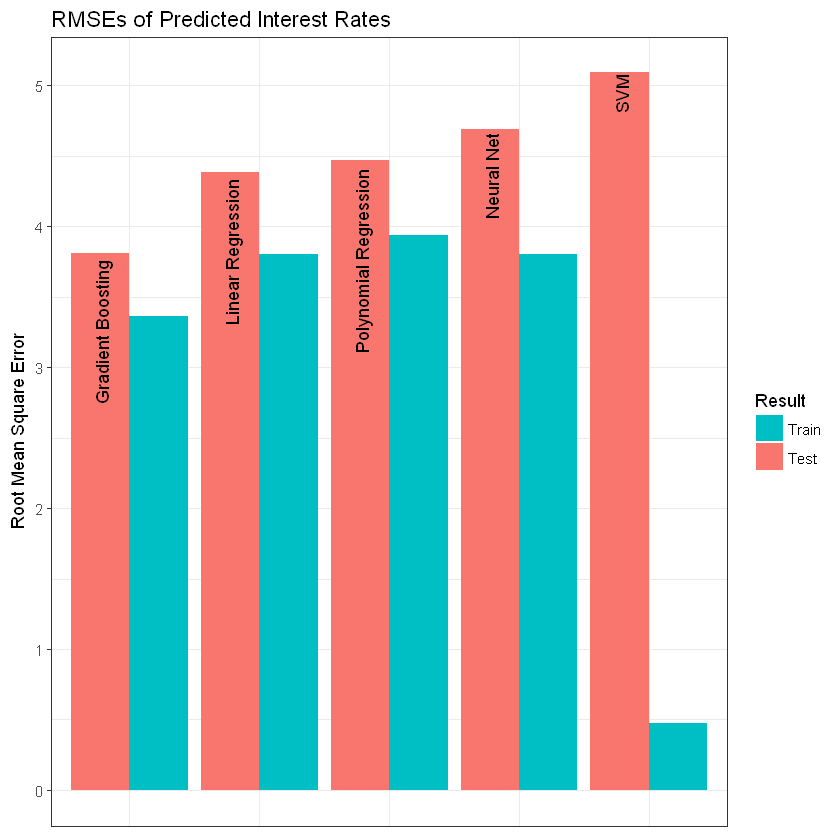

In [78]:
library(ggplot2)

p1 <- ggplot()+
geom_bar(aes(x=res_new[,"method"],y=as.numeric(res_new[,"RMSE"]),fill=factor(res_new[,"class"])), 
         stat="identity",position="dodge")+
scale_fill_discrete(name="Result",
                    breaks=c("Train", "Test"))+
theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
geom_text(aes(x=res_test[,"method"],y=as.numeric(res_test[,"RMSE"]),label=factor(res_test[,"method"]), 
              hjust = 1.05, vjust = -1.5, angle = 90), col = "black")+
ggtitle("RMSEs of Predicted Interest Rates")+
ylab("Root Mean Square Error")+
xlab("Method")+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
scale_x_discrete(limits=c('Gradient Boosting', 'Linear Regression', 'Polynomial Regression', 'Neural Net', 'SVM'))

p1

In [74]:
ggsave(filename="RMSE_int_rate.png", plot=p1, height = 3, width = 6)

### Plot Grades

In [79]:
res2 <- read.csv("res/res_grade.csv")

rownames(res2) <- c("train_rmse", "test_rmse")
method <- c('Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Gradient Boosting', 'SVM')

test_res2 <- cbind(method, t(res2[2,]), rep("Test", 5))
train_res2 <- cbind(method, t(res2[1,]), rep("Train", 5))

res2_new <- rbind(test_res2, train_res2)
colnames(res2_new) <- c("method", "RMSE", "class")
res2_new <- as.data.frame(res2_new)
res2_new$RMSE <- as.numeric(as.character(res2_new$RMSE))

res_test_grade <- res2_new[res2_new$class == "Test",]
res2

,Random.Forest,Naive.Bayes,KNN,Gradient.Boosting,SVM
train_rmse,0.279,1.222,0.000,1.017,0.000
test_rmse,1.012,1.262,1.299,1.041,1.216


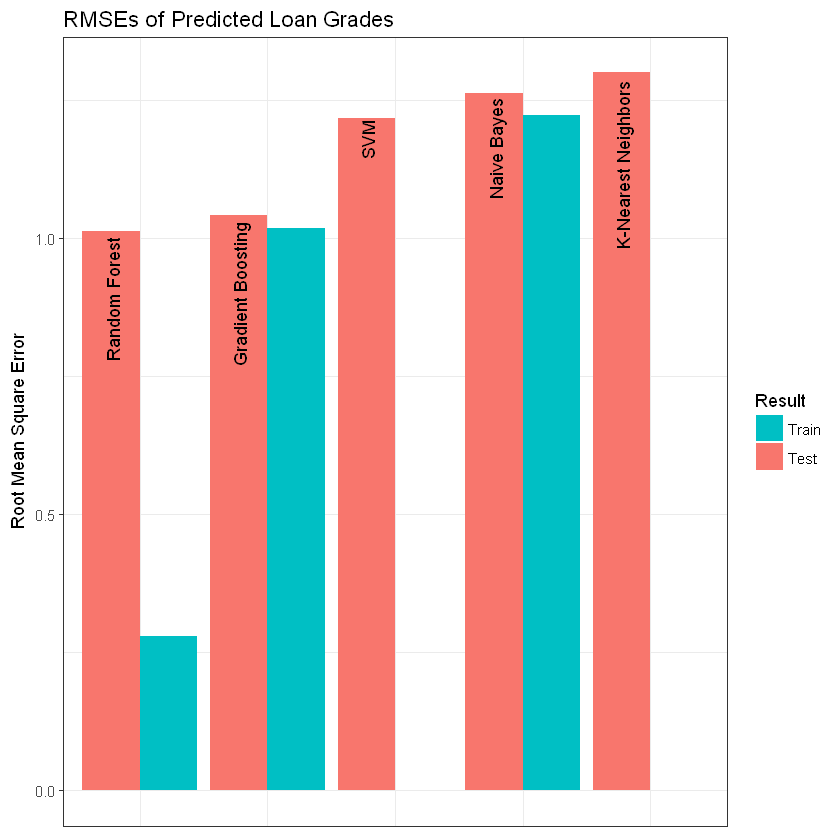

In [80]:
library(ggplot2)

p2 <- ggplot()+
geom_bar(aes(x=res2_new[,"method"],y=res2_new[,"RMSE"],fill=factor(res2_new[,"class"])), 
         stat="identity",position="dodge")+
scale_fill_discrete(name="Result",
                    breaks=c("Train", "Test"))+
theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
geom_text(aes(x=res_test_grade[,"method"],y=as.numeric(res_test_grade[,"RMSE"]),
              label=factor(res_test_grade[,"method"]), 
              hjust = 1.05, vjust = -1.5, angle = 90), col = "black")+
ggtitle("RMSEs of Predicted Loan Grades")+
ylab("Root Mean Square Error")+
xlab("Method")+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
scale_x_discrete(limits=c('Random Forest', 'Gradient Boosting', 'SVM', 'Naive Bayes', 'K-Nearest Neighbors'))
p2

In [81]:
ggsave(filename="RMSE_grade.png", plot=p2, height = 3, width = 6)